# Face Detection with OpenCV and Haash Cascade

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Reading the images from file
d_corleone = cv2.imread("./images/don-corleone.png",0)
m_corleone = cv2.imread("./images/michael-corleone.jpg",0)
m_corleone2 = cv2.imread("./images/michael-corleone2.jpg",0)
brazil_selection = cv2.imread("./images/brazil-selection.png",0)

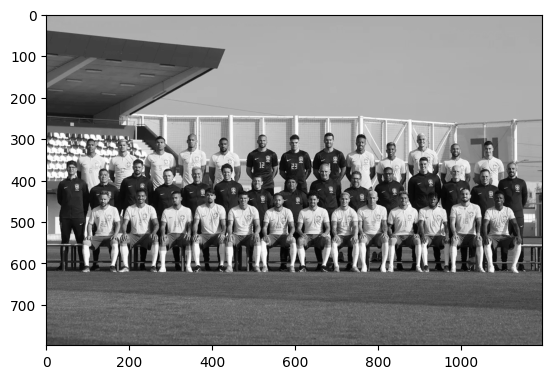

In [7]:
plt.imshow(brazil_selection, cmap="gray")

In [8]:
# Loading the pre-trained Haash Casdades xml files provided by OpenCV
# The Fontral Face Default contains about 6.000 classifiers that we're going to pass throught the images to see if they "fit" - that will be an indication whereas it has or not a face in the image
face_cascade = cv2.CascadeClassifier("./haarcascades/haarcascade_frontalface_default.xml")

In [60]:
def detect_face(img):

    face_img = img.copy()

    face_rectangle = face_cascade.detectMultiScale(face_img)

    for (x,y,w,h) in face_rectangle:
        cv2.rectangle(img=face_img, pt1=(x,y), pt2=(x+w, y+h), color=(255,255,255), thickness=5)

    return face_img

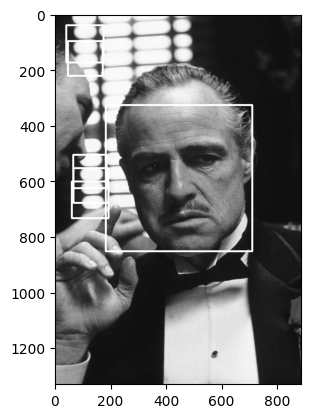

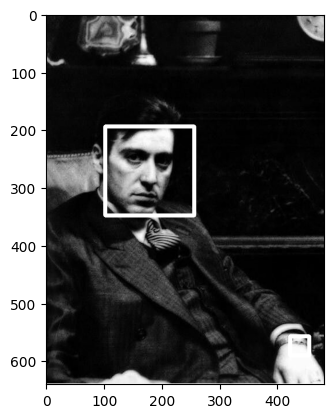

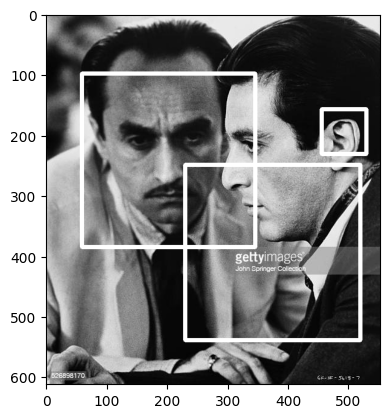

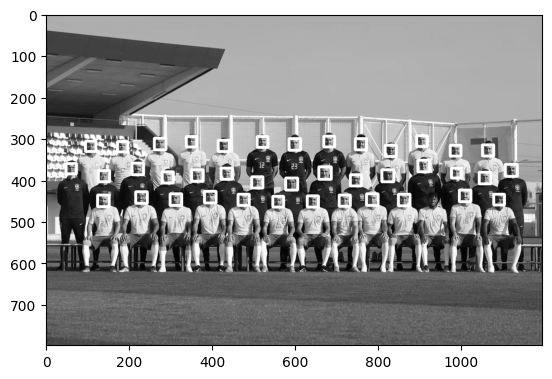

In [52]:
images = [d_corleone, m_corleone, m_corleone2, brazil_selection]

for i in range(len(images)):
    result = detect_face(images[i])
    plt.imshow(result, cmap="gray")
    plt.show()

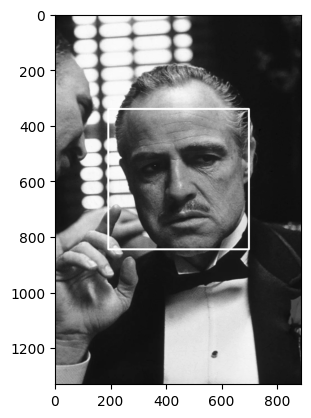

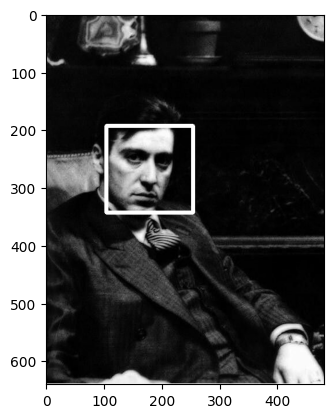

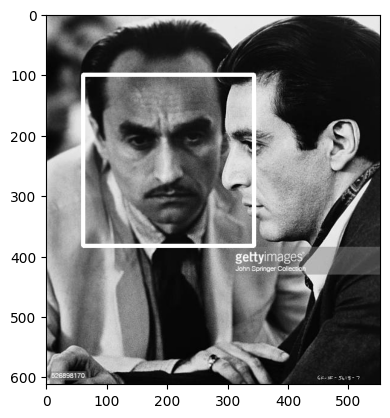

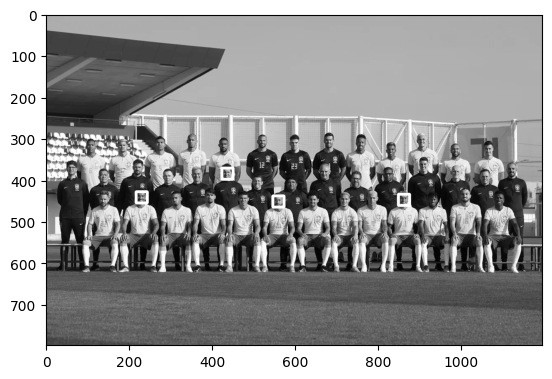

In [64]:
def adjusted_detect_face(img):

    face_img = img.copy()

    face_rectangle = face_cascade.detectMultiScale(face_img, scaleFactor = 1.2, minNeighbors=10)

    for (x,y,w,h) in face_rectangle:
        cv2.rectangle(img=face_img, pt1=(x,y), pt2=(x+w, y+h), color=(255,255,255), thickness=5)

    return face_img


for i in range(len(images)):
    result = adjusted_detect_face(images[i])
    plt.imshow(result, cmap="gray")
    plt.show()

In [63]:
cap = cv2.VideoCapture(0)

# Face detection with web-cam
while True:
    ret,frame = cap.read(0)

    frame = adjusted_detect_face(frame)

    cv2.imshow('Video Face Detection', frame)

    q = cv2.waitKey(1)
    if q == 27:
        break

cap.release()
cv2.destroyAllWindows()

In [71]:
# eyes detection with web-cam
eyes_cascade = cv2.CascadeClassifier("./haarcascades/haarcascade_eye.xml")

def detect_eyes(img):

    face_img = img.copy()

    eyes_rectangle = face_cascade.detectMultiScale(face_img, scaleFactor = 1.2)

    for (x,y,w,h) in eyes_rectangle:
        cv2.rectangle(img=face_img, pt1=(x,y), pt2=(x+w, y+h), color=(0,255,0), thickness=5)

    return face_img

cap = cv2.VideoCapture(0)

while True:
    ret,frame = cap.read(0)

    frame = detect_eyes(frame)

    cv2.imshow('Video Eyes Detection', frame)

    q = cv2.waitKey(1)
    if q == 27:
        break

cap.release()
cv2.destroyAllWindows()